# Análise Temporal

In [167]:
import pandas as pd
import numpy as np

from dateutil import parser
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

# Series Estacionárias
* A média da série não deve ser uma função do tempo, e sim uma constante. 
* Quando uma série temporal é estacionária, pode ser mais fácil modelar. 

## Análise Gráfica
* Série mostrando observação de nascimento de aves
* Série mostrando quantidade de passageiros por mês em uma cia área

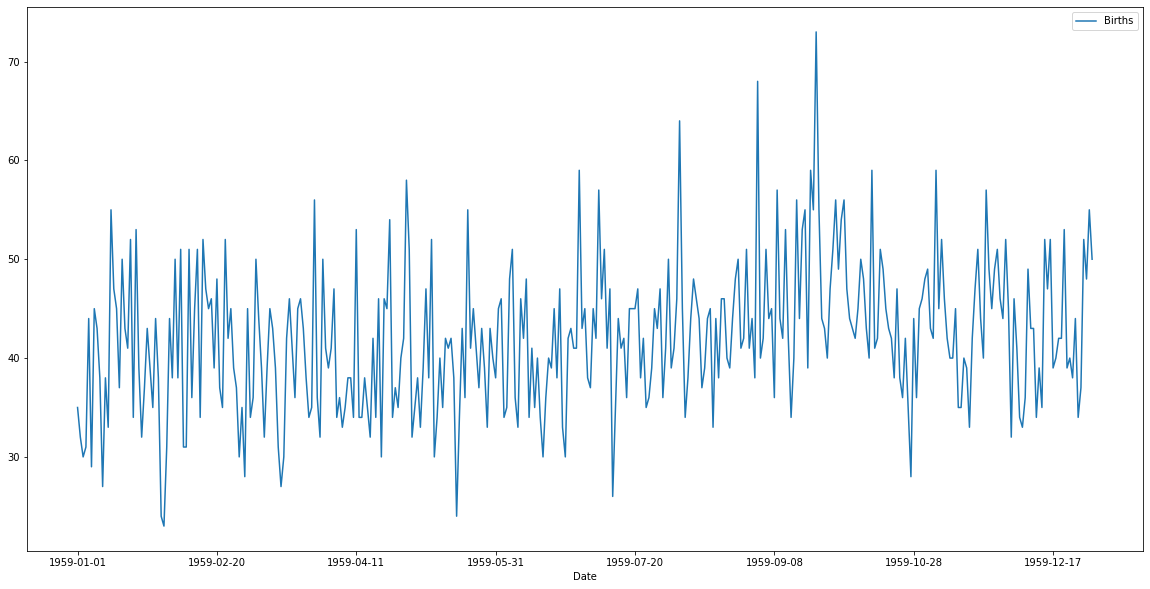

In [3]:
birds = pd.read_csv('dataset/daily-total-female-births.csv', header=0, index_col=0)
birds.plot(figsize=(20,10))
plt.show()

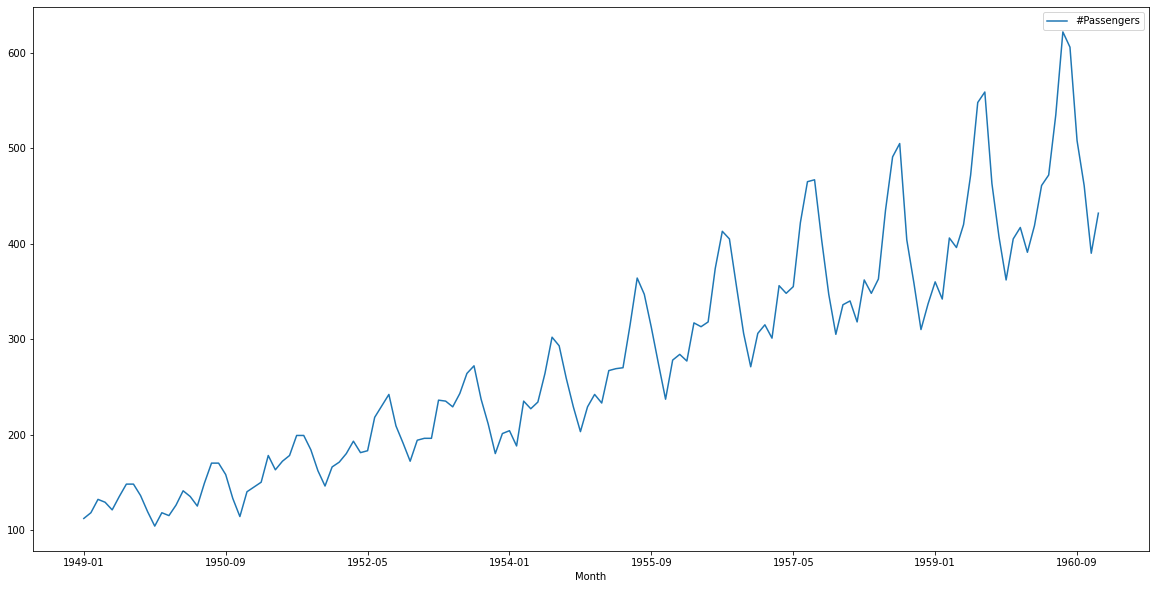

In [4]:
airPassagers = pd.read_csv('dataset/AirPassengers.csv', header=0, index_col=0)
airPassagers.plot(figsize=(20,10))
plt.show()

* A distribuição de nascimento de aves se mostra constante ao passar do tempo
* A distribuição de passageiros mostra duas características claras de não-estacionaridade
    * tendência: número crescente de passageiros
    * repetições de padrões em períodos específicos: meses de férias apresentam um pico de passageiros

## Estatistica Resumida

* Segmentando a série temporal in partições menores e comparando a média e variância de cada grupo
* Se a diferença é significativa a série é não-estacionária

* A seguir comparamos o histograma das duas séries

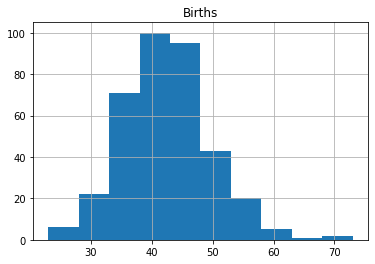

In [5]:
birds.hist()
plt.show()

## Obtendo média e variância de duas partes distinstas da série

In [6]:
X = birds.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media 1=%f, media 2=%f' % (mean1, mean2))
print('variancia 1=%f, variancia 2=%f' % (var1, var2))

media 1=39.763736, media 2=44.185792
variancia 1=49.213410, variancia 2=48.708651


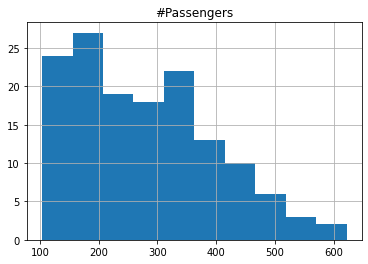

In [7]:
airPassagers.hist()
plt.show()

## Obtendo média e variância de duas partes distintas da série

In [8]:
X = airPassagers.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media 1=%f, media 2=%f' % (mean1, mean2))
print('variancia 1=%f, variancia 2=%f' % (var1, var2))

media 1=182.902778, media 2=377.694444
variancia 1=2244.087770, variancia 2=7367.962191


## Alterando a base de cia aérea para base log (alteração de escala)

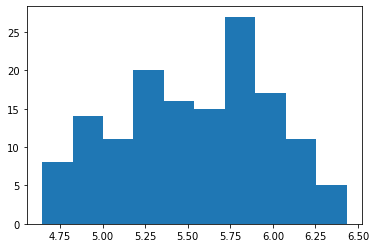

In [10]:
X = airPassagers.values
X = np.log(X)
plt.hist(X)
plt.show()

In [11]:
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media 1=%f, media 2=%f' % (mean1, mean2))
print('variancia 1=%f, variancia 2=%f' % (var1, var2))

media 1=5.175146, media 2=5.909206
variancia 1=0.068375, variancia 2=0.049264


## Comparando Resultado da Avaliação Estatística

* Dados de nascimento de aves
    * A média e variância das observações mostra um comportamente similar , remetendo a distribuição gaussiana 
    * Visualmente o histograma também reflete tal similaridade
* Dados de passageiros de avião
    * Para esse dataset a conclusão é que a distribuição é dependente no tempo, mostrando que é não-estacionária
* Dados de passageiros de avião (escala log)
    * Para esse dataset a curva fica bem próxima da gaussiana, e os números também mostram essa relação

# Teste Estatístico

* testes estatísticos são mais confiáveis para classisficar uma série como estacionária ou não-estacionária

## Teste Dickey-Fuller
* O teste Dickey-Fuller aumentado é um tipo de teste estatístico chamado teste de raiz unitária.

* A intuição por trás de um teste de raiz unitária é que ela determina com que intensidade uma série temporal é definida por uma tendência.

* A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (possui alguma estrutura dependente do tempo).

* A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.


* Nós interpretamos esse resultado usando o valor-p do teste. 
    * Um valor p abaixo de um limite (como 5% ou 1%) sugere que rejeitemos a hipótese nula (série é estacionária); 
    * caso contrário, um valor p acima do limiar sugere que falhamos em rejeitar a hipótese nula (série não é estacionária).
    * limiar 0,05
        * Valor p> 0,05: falha ao rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e não são estacionários.
        * Valor de p <= 0,05: rejeita a hipótese nula (H0), os dados não possuem uma raiz unitária e são estacionários.

## Teste adfuller para base de aves

In [16]:
X = birds.values
result = adfuller(X)
print('ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('H0: não é estacionária |','falha em aceitar H0' if result[1]<0.05 else 'aceita H0')

ADF: -4.808291
p-value: 0.000052
valores críticos:
	1%: -3.449
	5%: -2.870
	10%: -2.571
H0: não é estacionária | falha em aceitar H0


## Teste adfuller para base cia aérea

In [17]:
X = airPassagers.values
result = adfuller(X)
print('ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('valores criticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('H0: não é estacionária |','falha em aceitar H0' if result[1]<0.05 else 'aceita H0')

ADF: 0.815369
p-value: 0.991880
valores criticos:
	1%: -3.482
	5%: -2.884
	10%: -2.579
H0: não é estacionária | aceita H0


## Teste adfuller para base cia aérea (Escala Log)

In [18]:
X = airPassagers.values
X = np.log(X)
result = adfuller(X)
print('ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('valores criticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print('H0: não é estacionária |','falha em aceitar H0' if result[1]<0.05 else 'aceita H0')

ADF: -1.717017
p-value: 0.422367
valores criticos:
	1%: -3.482
	5%: -2.884
	10%: -2.579
H0: não é estacionária | aceita H0


## Funcionalidades do Python, Numpy e Pandas para manipular tipos de dados temporal
* Objeto primitivo para trabalhar com data e hora no python e Pandas (datetime)
* Funções diversas para trabalhar com data e hora (dateutil)
    * No exemplo abaixo parse de texto para objeto datetime

## Objeto Datetime do Python

In [19]:
from datetime import datetime
t = datetime(year=2015, month=7, day=4)
print(t)
print(type(t))

2015-07-04 00:00:00
<class 'datetime.datetime'>


## Operações com Datas Usando Dateutil
* Parser de data
* Visualização parcial de data

In [20]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
print(date)
date.strftime('%A')

2015-07-04 00:00:00


'Saturday'

## Suporte do Numpy para Operação com Datas

In [27]:
datenp = np.array('2015-07-04', dtype=np.datetime64)
print(datenp)
print(type(datenp))
print(datenp.dtype)

date = parser.parse("4th of July, 2015")
print(date)
print(type(date))

2015-07-04
<class 'numpy.ndarray'>
datetime64[D]
2015-07-04 00:00:00
<class 'datetime.datetime'>


## Criando Novas Datas Usando a Função Range

In [28]:
datenp + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## Representação de Datas por Nível de Detalhe

In [36]:
dt=np.datetime64('2015-07-04 12:59:59.50', 'ns')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 'as')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 's')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 'h')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 'Y')
print(dt)

2015-07-04T12:59:59.500000000
1970-01-01T00:00:04.924576063353126912
2015-07-04T12:59:59
2015-07-04T12
2015


## Tabela de Códigos de Especificação de Datas

Cód | Nível
----|-------
Y	| Year
M	| Month
W	| Week
D	| Day
h	| Hour
m	| Minute
s	| Second
ms	| Millisecond
us	| Microsecond
ns	| Nanosecond
ps	| Picosecond
fs	| Femtosecond
as	| Attosecond

## Pandas Manipulação de Dados Temporais

* O Pandas implementa as funcionalidades do objetos mostrados
* Função to_datetime converte uma coluna para tipo timestamp

In [37]:
date = pd.to_datetime("4th of July, 2015")
print(date)
date.strftime('%A')

2015-07-04 00:00:00


'Saturday'

## Gerando Dados Temporais
* converte para o tipo timestamp de data do pandas to_timedelta

In [38]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Objeto Series Indexado por Data

In [39]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

## Slicing com Datas

In [40]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

## Filtrando por Ano com Slicing

In [42]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Estruturas de dados de séries temporais do Pandas

* Timestamps

* Period

* Timedelta


In [50]:
dates = pd.to_datetime([datetime(2014, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '11-07-2015', '20140708', '05/08/2016'])
dates

DatetimeIndex(['2014-07-03', '2015-07-04', '2015-07-06', '2015-11-07',
               '2014-07-08', '2016-05-08'],
              dtype='datetime64[ns]', freq=None)

In [51]:
print(dates.to_period('D'))
print(dates.to_period('M'))
print(dates.to_period('Y'))

PeriodIndex(['2014-07-03', '2015-07-04', '2015-07-06', '2015-11-07',
             '2014-07-08', '2016-05-08'],
            dtype='period[D]', freq='D')
PeriodIndex(['2014-07', '2015-07', '2015-07', '2015-11', '2014-07', '2016-05'], dtype='period[M]', freq='M')
PeriodIndex(['2014', '2015', '2015', '2015', '2014', '2016'], dtype='period[A-DEC]', freq='A-DEC')


## Calcula Diferença entre Datas

In [56]:
(dates - dates[0])

TimedeltaIndex(['0 days', '366 days', '368 days', '492 days', '5 days',
                '675 days'],
               dtype='timedelta64[ns]', freq=None)

## Sequências Regulares: pd.date_range ()

* Funções para criação de sequências regulares de datas

* pd.date_range() recebe uma data inicial, final e uma quantidade opcional de valores a serem gerados no intervalo
* pd.period_range()  recebe uma data inicial, final e uma frequência: mensal, semanal, etc
* pd.timedelta_range() 

In [60]:
pd.date_range('2015-07-03', periods=8, freq='Y')

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [61]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [66]:
pd.period_range('2015-07-03', periods=8, freq='Y')

PeriodIndex(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='period[A-DEC]', freq='A-DEC')

In [68]:
pd.period_range('2015-07-03', periods=3, freq='W')

PeriodIndex(['2015-06-29/2015-07-05', '2015-07-06/2015-07-12',
             '2015-07-13/2015-07-19'],
            dtype='period[W-SUN]', freq='W-SUN')

In [63]:
pd.Series(pd.period_range('1/1/2011', freq='W', periods=3))

0    2010-12-27/2011-01-02
1    2011-01-03/2011-01-09
2    2011-01-10/2011-01-16
dtype: period[W-SUN]

In [64]:
pd.Series(pd.period_range('1/1/2011', freq='H', periods=5))

0    2011-01-01 00:00
1    2011-01-01 01:00
2    2011-01-01 02:00
3    2011-01-01 03:00
4    2011-01-01 04:00
dtype: period[H]

# Manipulação de Datasets de Dados Temporais

## Exemplo: Visualizando Contagens de Bicicleta em Seattle

* Fremont Bridge Seattle: sensor indutivo que contabiliza o número de bicicletas por hora
* O dataset e mais detalhes a respeito pode ser encontrado em: http://data.seattle.gov/
* Link direto para o dataset: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/data



In [70]:
data = pd.read_csv('dataset/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
print('Dataset shape:', data.shape)
data.head()

Dataset shape: (67128, 3)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


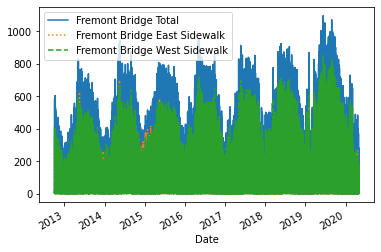

In [74]:
data.plot(style=['-', ':', '--'])
plt.show()

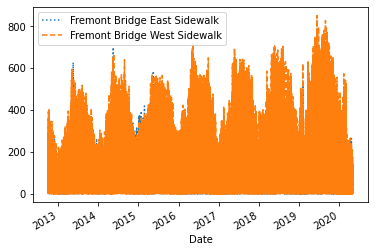

In [73]:
data[['Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']].plot(style=[ ':', '--'])
plt.show()

# Mudando a Frequência dos Dados
* Originalmente os dados estão em média horária, mas podem ser transformados para média semanal, mensal, etc
* Método resample

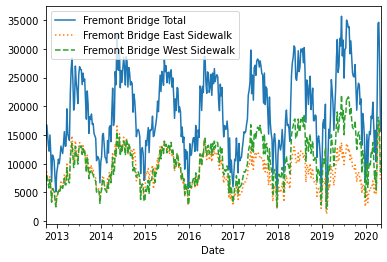

In [75]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.show()

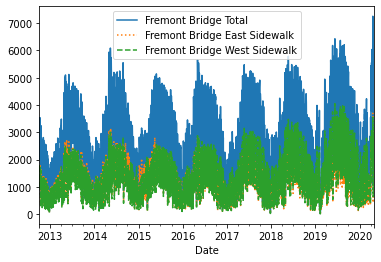

In [80]:
daily = data.resample('D').sum()
daily.plot(style=['-', ':', '--'])
plt.show()

## Agregando Dados por Intervalo de 30 Dias
* Usando função rolling

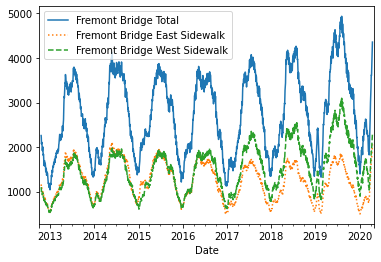

In [95]:
daily = data.resample('D').sum()
daily = daily.rolling(30, center=True).mean()
daily.plot(style=['-', ':', '--'])
plt.show()

* A irregularidade do resultado é devida ao forte corte da janela. Podemos obter uma versão mais suave de uma média móvel usando uma função de janela 
* Por exemplo, uma janela gaussiana
* O código a seguir especifica a largura da janela
* Largura do gaussiano dentro da janela

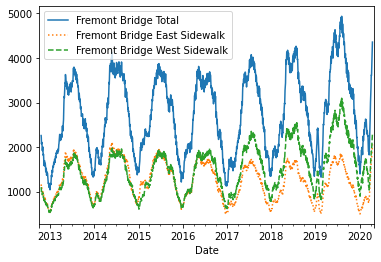

In [96]:
daily.rolling(30, center=True, win_type='gaussian').mean(std=10)
daily.plot(style=['-', ':', '--'])
plt.show()

## Agrupando Dados
* Obtendo uma visão de tráfego por hora do dia

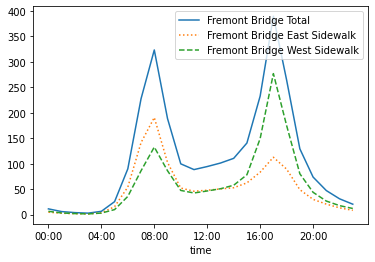

In [100]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 60 * 60 * 4 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--'])
plt.show()

## Agrupando por Dia da Semana

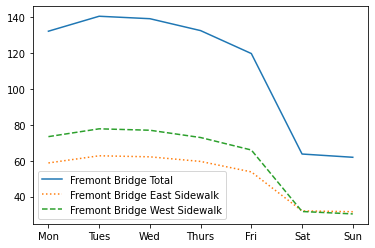

In [103]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'])
plt.show()

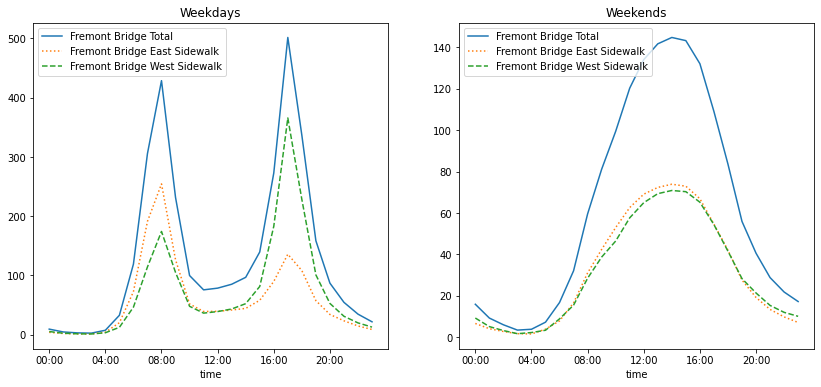

In [140]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
ticks = by_time.index.get_level_values(1)
hourly_ticks = 60 * 60 * 4 * np.arange(6)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
by_time.loc[('Weekday', slice(None))].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc[('Weekend', slice(None))].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=['-', ':', '--'])
plt.show()